In [43]:
import torch
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
import torch.nn.functional as F
from torch import optim

%matplotlib inline

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)), ])

trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download = False, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

testset = datasets.MNIST('~/.pytorch/MNIST_data/', download = False, train = False, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True )

C:\Users\parid\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 60 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


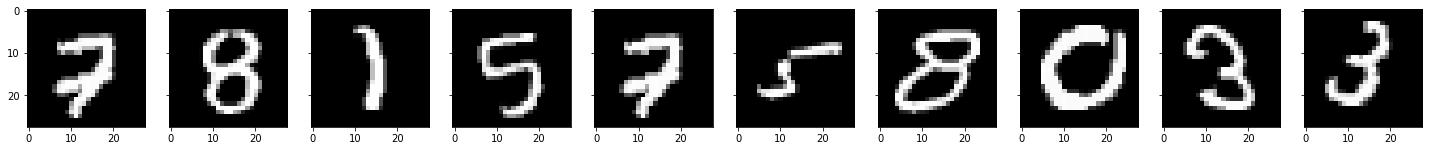

In [45]:
images, labels = next(iter(trainloader))
images = images.numpy()
i = np.random.random_integers(1,60,10)

fig, axes = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True, figsize=(25,4))

for k,ax in zip(i,axes):
    ax.imshow(np.squeeze(images[k]), cmap = 'gray')

In [46]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
               
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = (F.relu(self.fc1(x)))
        x = (F.relu(self.fc2(x)))
        x = F.log_softmax(self.fc3(x), dim=1)
        
        return x
    
model = Classifier()

In [47]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)
criterion = nn.NLLLoss()

In [48]:
#images = images.view(images.shape[0], -1)

epochs = 20
for e in range(epochs):
    LearningLoss = 0
    i = 0
    for images, labels in trainloader:
        #images = images.view(images.shape[0], -1)
        
        logits = model(images)
        loss = criterion(logits, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        LearningLoss += loss.item()
    else:
        print(f"epoch {e+1}: {LearningLoss/ len(trainloader)}")

epoch 1: 1.1110389479982066
epoch 2: 0.3948610279955335
epoch 3: 0.3301697021830819
epoch 4: 0.29923708752782613
epoch 5: 0.27455903641355317
epoch 6: 0.2528719995210547
epoch 7: 0.2330108492422714
epoch 8: 0.21529108036095018
epoch 9: 0.19846464278124798
epoch 10: 0.18342108440313384
epoch 11: 0.16973964616989912
epoch 12: 0.1586958738738921
epoch 13: 0.14835467867092536
epoch 14: 0.13923770974257163
epoch 15: 0.13113467546025
epoch 16: 0.12371473729427752
epoch 17: 0.11684638053091413
epoch 18: 0.11107409422073378
epoch 19: 0.10518749710271703
epoch 20: 0.09994652012942919


In [65]:
images, labels = next(iter(testloader))
L = 0
for images, labels in testloader:
    with torch.no_grad():
        logits = model(images)
    p = torch.argmax(torch.exp(logits), dim = 1)
    a.append(p)
    for i in range(len(p)):
        if(p[i] == labels[i]):
            L += 1
            
print(f"Accuracy: {L * 100/len(testloader.dataset)}%")

Accuracy: 96.48%


C:\Users\parid\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 61 + 1) instead
  """Entry point for launching an IPython kernel.


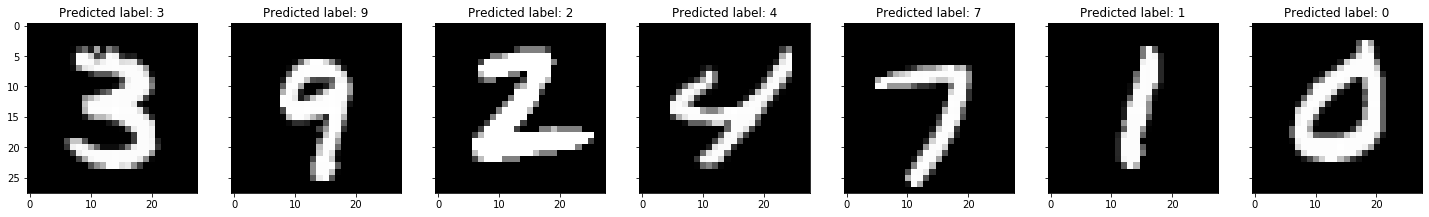

In [64]:
i = np.random.random_integers(1,61,7)
a = []

images, labels = next(iter(testloader))
for x in i:
    with torch.no_grad():
        logits = model(images[x])
    p = torch.argmax(torch.exp(logits), dim = 1)
    a.append(int(p))
    
fig, axes = plt.subplots(nrows=1, ncols=7, sharex=True, sharey=True, figsize=(25,4))
t = 0
for k,ax in zip(i,axes):
    ax.imshow(np.squeeze(images[k]), cmap = 'gray')
    #s = 'Predicted label: ' + a[0][k]
    ax.set_title(f"Predicted label: {a[t]}")
    t += 1